# CoSP Assignment 2: Dialogue Acts

### Submission details:

* **Deadline: Wednesday 15/11/2017 at 20:00** Please submit your work on time. Late submissions will not be graded.
* You can do the assignment either individually, or in a group of 2 people.
* Submit the .ipynb file containing your code **via email to nadine.theiler@uva.nl using "[CoSP17] Assignment 2" as a subject line**. Rename the .ipynb file so that the file name contains your last name(s), e.g. assignment2_ntheiler.ipynb. If you submit your answers as a group, clearly indicate this in the name of the file, and preferably also in the comment section.
* For every question, it is indicated how many points you can maximally get for it. The total number of points for the assignment is 100. The assignment also contains a bonus question for which you can get 10 points.

### Some technical remarks:
* You should write your code and answers **in this Jupyter notebook**. The blocks for code and text are already created, just click on them and change the content.
* Make sure we can run the notebook. If you can run your notebook from the folder *cosp2017_practical* you downloaded during the introductory practical session without modifications, then your setup should be ok and we should be able to run your notebook too. 
* If you want to run a particular cell in the notebook, make sure you also run the cells above it that it depends on.
* Make sure to put "%pylab inline" somewhere in the beginning of your notebook, such that plots will appear inline.

In [1]:
# imports
%matplotlib inline
from swda_time import CorpusReader
from swda_time import Transcript
import matplotlib.pyplot as plt
import numpy as np
import nltk

# generate corpus reader
corpus = CorpusReader('swda_time', 'swda_time/swda-metadata-ext.csv')

## Timing distributions for particular types of dialogue acts

As different dialogue acts have different functions in the conversation, their turn taking timing distribution might also be different. We will start by exploring this.

**Question 1 (15 points)**

Pick two forward-looking and two backward-looking dialogue acts. Reusing your code from the previous assignment, compute the mean transition times for these dialogue acts (as before, we are considering the dialogue act and transition time concerning the turn *taker* of the transition). Look at section 3.1 at http://compprag.christopherpotts.net/swda.html#tags for the meaning of the different dialogue tags. Print or plot your results in a readable fashion and also describe in words what you observe.

In [2]:
# put here your code to compute and print the means of transition times for different dialogue acts
# we'll do it for b (backchannel) and ba (appreciation) because they're the 2 most common backward looking acts,
# then fc (conventional-closing) and fp (conventional-opening) for the same reason
from collections import Counter
from collections import defaultdict

def gather_stats(f, dic):
    for transcript in corpus.iter_transcripts(display_progress=True):
        end_prev_turn = transcript.utterances[0].end_turn
        cur_turn_index = transcript.utterances[0].turn_index

        # loop over all utterances
        for utterance in transcript.utterances:
            # check if turn transition took place
            if utterance.turn_index == cur_turn_index:
                end_prev_turn = utterance.end_turn
                continue

            # compute transition time
            try:
                transition_time = utterance.start_turn - end_prev_turn
                f(dic, utterance, transition_time)
            #    transition_times_da[utterance]
            #    transition_times_gender[utterance.caller_sex].append(transition_time)
            except TypeError:
                pass
            # reset turn index and end of turn
            end_prev_turn, cur_turn_index = utterance.end_turn, utterance.turn_index

def get_trans_time_per_da(dic, utterance, transition_time):
    dic[utterance.act_tag].append(transition_time)

transition_times_da = defaultdict(lambda: [])
gather_stats(get_trans_time_per_da, transition_times_da)

transcript 645


Now we have a dictionary wit all transition times per dialogue act. We can proceed to plot

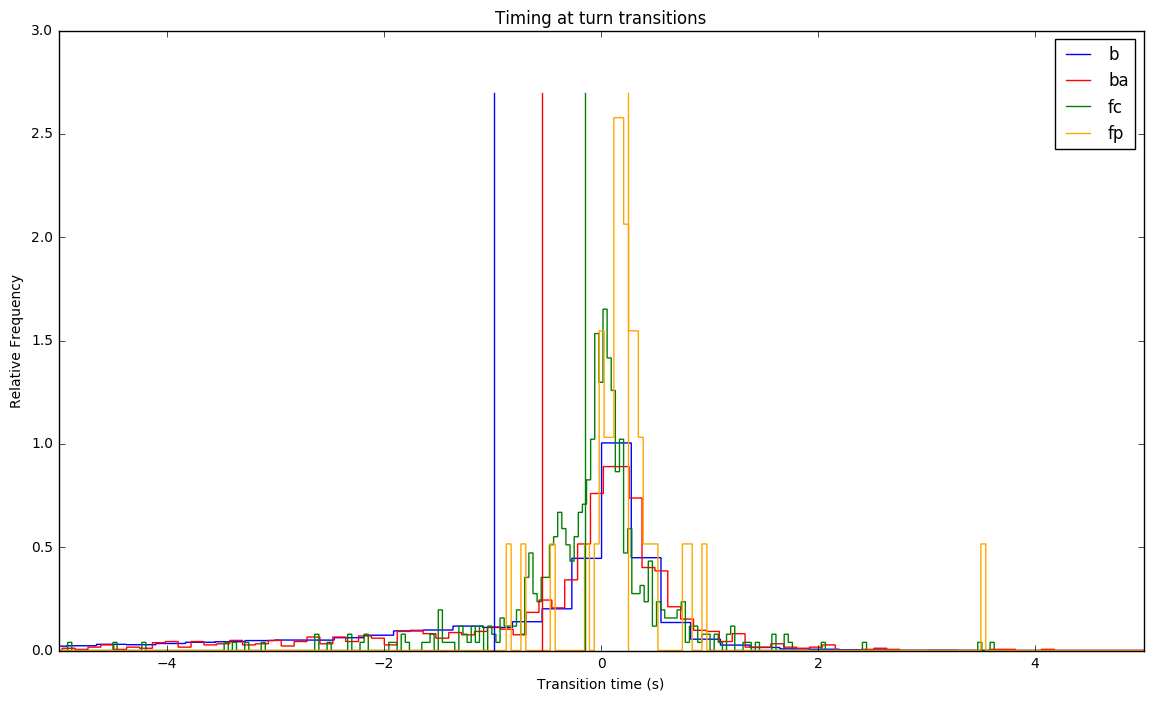

In [3]:
# dictionary for colors
das = ['b', 'ba', 'fc', 'fp']
cdict = dict(zip(das, ['blue','red', 'green', 'orange']))

plt.figure(figsize=(14,8))
for var in das:
    mean = np.mean(transition_times_da[var])
    plt.axvline(x=mean, ymin=0, ymax=0.9, label=str(var), color=cdict[var])
    n, bins, patches = plt.hist(transition_times_da[var], 300, histtype='step', normed=True, color=cdict[var])
plt.axis([-5, 5, 0, 3])
plt.title("Timing at turn transitions")
plt.xlabel("Transition time (s)")
plt.ylabel("Relative Frequency")
plt.legend()

The mean transition time for 'b' utterances is way beyond the mode. And even without plotting the median we can notice it is beyond the mode, as that peak is tilted to the right (i.e. there's much mass on the negative range). This means that most of the time people emit a 'b' utterance (e.g. 'yeah', 'right!') they overlap. This is to be expected as such utterances are normally not meant to start talking but to just acknowledge what the other person is saying while still listening.
'ba' utterances feature the same behavior but to a lesser extent, as the mean is roughly half the way between 0 and the 'b' mean. This is also expected as, unlike 'b' utterances that only intend to indicate acknowledgement without further input, 'ba' utterances are an actual appreciation judging the previous message (e.g. 'that's though'). While such utterances are most of the time used in a similar way as 'b', there is a significant proportion of cases in which they're used after a pause (probably to keep on talking instead of just acknowledging)
'fc' utterances refer to 'conventional closing' such as 'well, it's been nice talking to you'. Therefore one would expect them to have a mean not as far left as 'b' or 'ba' utterances, which is the case.
Finally, 'fp' utterances, that refer to a conventional opening have a mean above 0 which is pretty intuitive: a conventional opening is to be expected only at the beginning of a transcript (conversation), uttered at most once per transcript party. The first one is ignored for our purposes as there is no previous utterance to measure its transition time against, so only if it appears as the second utterance it will be considered (in fact, in the whole collection there are only 121 such utterances. For perspective, there are 18338 'b' utterances, 2488 'ba' and 1320 'fc' ones). Most such utterances leave a slight pause before replying and this is reflected in the plot

## Dialogue acts and syntax

Let's first focus on one particular dialogue act, namely questions. To get an impression of what questions in the corpus look like, you can use the code block below, which allows you to browse through the questions in the corpus one by one: press enter to go to the next one, and press 'q' to interrupt. You can also change the second line if you want to consider only certain types of questions.

In [ ]:
#for ut in corpus.iter_utterances(display_progress=True):
q_string = 'qh'
for trans in corpus.iter_transcripts():
    for ut in trans.utterances:
        if ut.act_tag[:len(q_string)] == q_string:
            for tree in ut.trees:
                print ut.text, "\tact tag: ", ut.damsl_act_tag(), "\tRootnode label: ", tree.label()
                print(tree)
                next = raw_input()
                if next == 'q':
                    raise KeyboardInterrupt

transcript 1

{D You know, }  is there something else we could have done, {D you know, } in checking out all  the places that, {F uh, } might be available.  / 	act tag:  qh 	Rootnode label:  SQ
(SQ
  (PRN (S (NP-SBJ (PRP You)) (VP (VBP know))) (, ,))
  (VBZ is)
  (NP-SBJ (EX there))
  (NP-PRD
    (NP (NN something))
    (ADVP (RB else))
    (SBAR
      (WHNP-1 (-NONE- 0))
      (S
        (NP-SBJ-2 (PRP we))
        (VP
          (MD could)
          (VP (VB have) (VP (VBN done) (NP (-NONE- *T*-1)))))))
    (PRN (, ,) (S (NP-SBJ (PRP you)) (VP (VBP know))) (, ,))
    (PP
      (IN in)
      (S-NOM
        (NP-SBJ (-NONE- *-2))
        (VP
          (VBG checking)
          (PRT (RP out))
          (NP
            (NP (PDT all) (DT the) (NNS places))
            (SBAR
              (WHNP-3 (WDT that))
              (, ,)
              (INTJ (UH uh))
              (, ,)
              (S
                (NP-SBJ (-NONE- *T*-3))
                (VP
                  (MD might)
                  (VP (VB b

transcript 16

{C And, } {D you know, } who's to put  the limit on it?  / 	act tag:  qh 	Rootnode label:  SBARQ
(SBARQ
  (CC And)
  (PRN (, ,) (S (NP-SBJ (PRP you)) (VP (VBP know))) (, ,))
  (WHNP-1 (WP who))
  (SQ
    (NP-SBJ-2 (-NONE- *T*-1))
    (VP
      (BES 's)
      (S
        (NP-SBJ (-NONE- *-2))
        (VP
          (TO to)
          (VP
            (VB put)
            (NP (DT the) (NN limit))
            (PP-PUT (IN on) (NP (PRP it))))))))
  (. ?)
  (-DFL- E_S))



transcript 18

{E I mean, }  what's the other one, {F uh, } # C B S. # / 	act tag:  qh 	Rootnode label:  SBARQ
(SBARQ
  (PRN (S (NP-SBJ (PRP I)) (VP (VBP mean))) (, ,))
  (WHNP-1 (WP what))
  (SQ
    (BES 's)
    (NP-SBJ (DT the) (JJ other) (NN one))
    (NP-PRD (-NONE- *T*-1))
    (, ,)
    (INTJ (UH uh)))
  (, ,))

{E I mean, }  what's the other one, {F uh, } # C B S. # / 	act tag:  qh 	Rootnode label:  NP
(NP (NP (NNP C) (NNP B) (NNP S)) (. .) (-DFL- E_S))

who would steal a newspaper?  / 	act tag:  qh 	Rootnode label:  SBARQ
(SBARQ
  (WHNP-1 (WP who))
  (SQ
    (MD would)
    (NP-SBJ (-NONE- *T*-1))
    (VP (VB steal) (NP (DT a) (NN newspaper))))
  (. ?)
  (-DFL- E_S))


** Question 2 (20 points)**

Now that you have seen some examples of the syntactic structure of questions, do you think it is possible to reliably predict the dialogue act 'question' in the corpus from features the syntactic trees? Suggest some possible heuristics for doing this, but also reflect on where these heuristics might fall short: do they predict dialogue acts to be questions that actually are no questions? or do they wrongly predict questions to be non-questions? Illustrate your answers by giving examples from the corpus.

Answer:
The easiest way to tell is with the presence of a question mark node (annotated with a '.', with '?' as terminal). There are some questions that wouldn't have this (e.g. transcript 16: "{C And, } {D you know, } who's to put  the limit on it?", of type 'qh' for rhetorical question).
To capture those instances that escape from the above rule, we could check if the  verb appears before the subject in the tree, as in the qo utterance from transcript 1: '{F Uh, } first, {F um, } I need to know, {F uh, }  how do you feel [ about, + {F uh, } about ] sending, {F uh, } an elderly, {F uh, } family member to a nursing home?'. Its tree includes the subtree (SQ (VBP do) (NP-SBJ (PRP you)) ...) with VBP before PRP. Still, there are examples such as the one from transcript 16 above, whose tree includes the subtree: (S (NP-SBJ (PRP you)) (VP (VBP know))). There, you see that 'know' appears after 'you', and the only hint we could've taken to detec a question was the 'do' before 'you', but the tree didn't capture that word. However it offered an insight for a new rule: the presence of an interrogative pronoun.
'What', 'which' and other interrogative pronouns are marked with 'wp' POS tag, so the precense of such tag can reveal a question utterance.


In [20]:
# Codesupporting answer
from collections import Counter
q_acts = []
for transcript in corpus.iter_transcripts():
    for ut in transcript.utterances:
        q_acts.append(ut.act_tag)
q_acts = list(filter(lambda x: x[0] == 'q', q_acts))
q_acts = Counter(q_acts)
print(q_acts.most_common())
#q_acts = [act for act in transition_times_da.keys() if act[0] == 'q']
#qact_counter = [(q_act,len(transition_times_da[q_act])) for q_act in q_acts]
#sorted(qact_counter, lambda x, y: x[1] < y[1])
#qact_counter.sort(key=lambda x: -x[1])
#qact_counter

[('qy', 2102), ('qw', 1093), ('qy^d', 669), ('qo', 378), ('qh', 303), ('qy^g', 279), ('qr', 123), ('qrr', 98), ('qy^t', 52), ('qw^d', 50), ('qw^t', 26), ('qy^r', 14), ('qy^h', 12), ('qy^c', 11), ('qy^m', 9), ('qw^h', 8), ('qy^g^t', 8), ('qr^d', 6), ('qw^r', 6), ('qy^2', 5), ('qo^t', 4), ('qrr^t', 4), ('qo^d', 3), ('qy^d^r', 3), ('qy^d^t', 3), ('qh^m', 3), ('qrr^d', 3), ('qy^g^c', 2), ('qy^c^r', 2), ('qw^g', 2), ('qy^d^h', 2), ('qh^h', 2), ('qy(^q)', 1), ('qr^t', 1), ('qo^r', 1), ('qy^d(^q)', 1), ('qw^c', 1), ('qw^d^t', 1), ('qw^d^c', 1), ('qr(^q)', 1), ('qy^g^r', 1), ('qy^d^m', 1), ('qh^c', 1), ('qh^g', 1), ('qh^r', 1), ('qo^d^c', 1)]


**Question 3 (25 points)**

Now, building on your findings from question 2, choose a (set of) question type(s) and implement a method to identify instances of this/these type(s) based on syntactic trees. For instance, you could use the root label of the tree (recall from the practical session that the root label of a tree can be accessed using the *label()* method).

Evaluate your method and report recall, accuracy, percentage of false  positives and the 3 most common tags for false positives.

Answer:
*your answer*

In [ ]:
# Code to support your answer, test your method and compute the 3 most commonly confused dialogue acts.

## Words and dialogue acts

We will now explore the association between words and dialogue acts (DAs). The utterance class contains a method *pos_lemmas()* that returns a list with tuples of POS-tags and lemmas in the sentence. We use this method to create a dictionary keeping track of how often each word is associated with each dialogue act:

In [ ]:
from collections import defaultdict
words_acts = defaultdict(lambda: defaultdict(int))

for ut in corpus.iter_utterances(display_progress=True):
    act = ut.damsl_act_tag()
    for word in ut.pos_words():
        words_acts[word][act] += 1

For example, let's see how many instances of 'and' we found in yes-no questions, and also how many instances of 'or':

In [ ]:
print 'Number of instances of "and" in yes-no questions:', words_acts['and']['qy']
print 'Number of instances of "or" in yes-no questions:', words_acts['or']['qy']

Of course, there are very many words, and we are not particularly interested in words that occur only once or twice. We filter the dhictionary to contain only words over a certain threshold (that we set to 20 for now).

In [ ]:
count_threshold = 20
words_acts_restricted = dict(item for item in words_acts.items() if sum(item[1].values()) > count_threshold)
print "total number of words:", len(words_acts)
print "Number of words that occur more than 20 times: ", len(words_acts_restricted)

**Question 4 (20 points)**

Compute the average number of DA tags a word is associated with. Find two words that very reliably predict some DA tag as well as two words that are very uninformative (because they appear in many types of DAs). (You may do this qualitatively, you don't have to find the words that most or least reliably predict a dialogue tag)

Answer:
*your answer*

In [ ]:
# code supporting your answer

## A co-occurrence matrix

For the last question, we continue with investigating the relation between words and dialogue acts. First, we create a matrix that represents co-occurrences of words and DA tags. Essentially, this matrix holds the same information as the dictionary we used in question 4. The reason we opt for a matrix here is simply that we can easily use it as input for the clustering algorithm.

In [ ]:
from itertools import chain, product

# create vocabulary and tag list
vocabulary_list = sorted(words_acts_restricted.keys(), key = lambda x : sum(words_acts_restricted[x].values()), reverse=True)
tag_list = list(set(chain.from_iterable([tag_dict.keys() for tag_dict in words_acts_restricted.values()])))

# co-occurence matrix
word_act_matrix = np.zeros(shape=(len(vocabulary_list),len(tag_list)))
for i,j in product(np.arange(len(vocabulary_list)), np.arange(len(tag_list))):
    word_act_matrix[i,j] = words_acts_restricted[vocabulary_list[i]][tag_list[j]]

**Example:** the word 'the' has index 3 in the vocabulary list above. The tag 'qy' has index 32 in the tag list above. To find out how often 'the' occured in a 'qy' act, we can look up the value in the 3rd row and 32nd column of the matrix. This gives us the same value we would find in the dictionary if we looked up 'the' and 'qy'.

In [ ]:
print 'Word with index 3 in vocabulary_list:', vocabulary_list[3]
print 'Word with index 32 in tag_list:', tag_list[32]
print 'Number of the/qy co-occurrences retrieved from matrix:', word_act_matrix[3,32]
print 'Number of the/qy co-occurrences retrieved from dictionary:', words_acts_restricted['the']['qy']

## Clustering dialogue acts

We now use the matrix to do some clustering. We won't look at word clusters, though, because the number of words is so large that studying their clusters wouldn't be feasible here. Instead, we will look at dialogue act clusters. In order to do so, we first have to take the transpose of the matrix:

In [ ]:
act_word_matrix = word_act_matrix.transpose()

# normalise such that vectors have the same length
def vector_norm(vec):
    return vec / np.sqrt(np.dot(vec, vec))

act_word_matrix_norm = map(vector_norm, act_word_matrix)

We will use a simple clustering algorithm called K-means (if you have no idea what this does, it would be a good idea to look at the Wikipedia page: https://en.wikipedia.org/wiki/K-means_clustering). The nltk library provides a function to apply this algorithm.

In [ ]:
import nltk.cluster as c

# set the number of clusters
n_clusters=10

# create the clusterer
clusterer = c.KMeansClusterer(num_means=n_clusters, distance=nltk.cluster.util.euclidean_distance, normalise=False)

cluster_vector = clusterer.cluster(act_word_matrix_norm, assign_clusters=True)

clusters = defaultdict(list)
for i in xrange(len(tag_list)):
    tag = tag_list[i]
    cluster_index = cluster_vector[i]
    clusters[cluster_index].append(tag)

i = 1
for cluster in clusters:
    print "\nCluster %i: %s" % (i, str(clusters[cluster]))
    i+=1

** Question 6 (20 points)**

Experiment with the code above, change the number of clusters and check how consistent the clusters are that are found by the algorithm. Do the clusters you find seem sensible? Report your findings.

*Your answer*

** Bonus question (10 points)**

Formulate and answer your own question.